In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1 : MRI Dataset - Kirby21

## Importing Data Set

In [66]:
df=pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
df=df.drop(['Unnamed: 0','min','max','mean','std','id'],axis=1)
df=df.loc[df.rawid=='kirby906a_ax.img']
df.head(10)

,rawid,roi,volume,type,level,icv,tbv
12540,kirby906a_ax.img,Telencephalon_L,467063,1,1,1195015,1123076
12541,kirby906a_ax.img,Telencephalon_R,470488,1,1,1195015,1123076
12542,kirby906a_ax.img,Diencephalon_L,8801,1,1,1195015,1123076
12543,kirby906a_ax.img,Diencephalon_R,9054,1,1,1195015,1123076
12544,kirby906a_ax.img,Mesencephalon,9564,1,1,1195015,1123076
12545,kirby906a_ax.img,Metencephalon,154071,1,1,1195015,1123076
12546,kirby906a_ax.img,Myelencephalon,4035,1,1,1195015,1123076
12547,kirby906a_ax.img,CSF,71939,1,1,1195015,1123076
12548,kirby906a_ax.img,CerebralCortex_L,246947,1,2,1195015,1123076
12549,kirby906a_ax.img,CerebralCortex_R,245855,1,2,1195015,1123076


## Part 1: Calculating and Reporting TBV and ICV for Type 1 Level 1 Data

In [68]:
t1l1=df.loc[(df.type==1) & (df.level==1)]
t1l1=t1l1.assign(icv_calc = sum(t1l1.volume))
t1l1=t1l1.assign(tbv_calc=sum(t1l1.volume[t1l1.roi!='CSF']))
t1l1.head(10)

,rawid,roi,volume,type,level,icv,tbv,icv_calc,tbv_calc
12540,kirby906a_ax.img,Telencephalon_L,467063,1,1,1195015,1123076,1195015,1123076
12541,kirby906a_ax.img,Telencephalon_R,470488,1,1,1195015,1123076,1195015,1123076
12542,kirby906a_ax.img,Diencephalon_L,8801,1,1,1195015,1123076,1195015,1123076
12543,kirby906a_ax.img,Diencephalon_R,9054,1,1,1195015,1123076,1195015,1123076
12544,kirby906a_ax.img,Mesencephalon,9564,1,1,1195015,1123076,1195015,1123076
12545,kirby906a_ax.img,Metencephalon,154071,1,1,1195015,1123076,1195015,1123076
12546,kirby906a_ax.img,Myelencephalon,4035,1,1,1195015,1123076,1195015,1123076
12547,kirby906a_ax.img,CSF,71939,1,1,1195015,1123076,1195015,1123076


## Part 2: Creating and Displaying Data Frame to store Type and Level Wise Total Volume
## Part 3: Plots to visualize this subject's Type 1 Level 2 data and Type 1 Level 3 data

,type,level,total_volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124
5,2,1,1195015
6,2,2,1195022
7,2,3,1195032
8,2,4,1195041
9,2,5,1195092


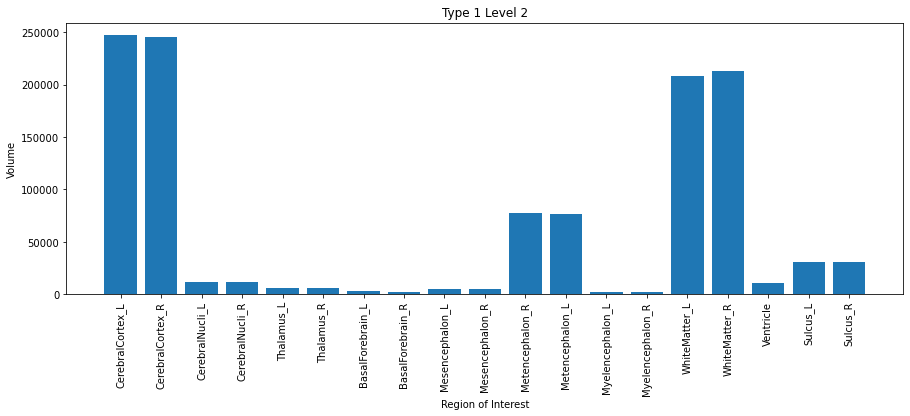

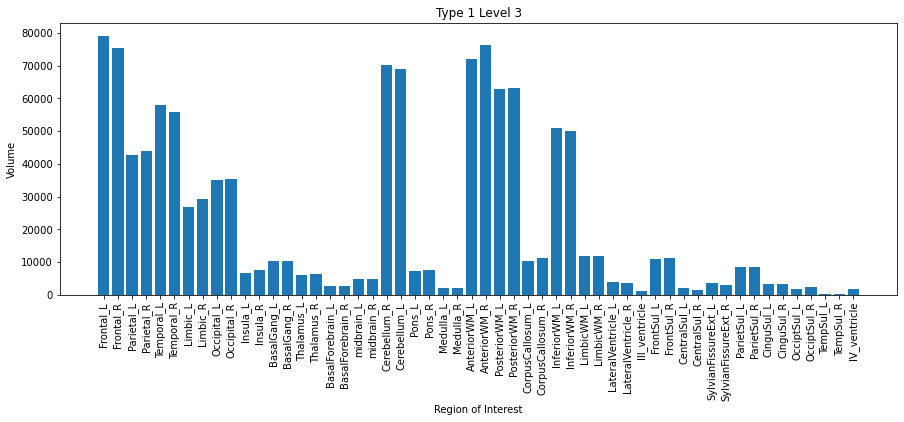

In [70]:
type_arr=np.unique(df.type)
level_arr=np.unique(df.level)
sum_t_l=pd.DataFrame(columns=['type','level','total_volume'])
for i in type_arr:
    for j in level_arr:
        subset_df=df.loc[(df.type==i) & (df.level==j)]
        subset_total_volume=sum(subset_df.volume)
        sum_t_l=sum_t_l.append({'type':i,'level':j,'total_volume':subset_total_volume},ignore_index=True)
        
        if(i==1 and j==2):
            plt.figure(figsize=(15,5))
            b=plt.bar(subset_df.roi,subset_df.volume)
            plt.xticks(rotation=90)
            plt.xlabel('Region of Interest')
            plt.ylabel('Volume')
            plt.title('Type '+str(i)+' Level '+str(j))
            
        if(i==1 and j==3):
            plt.figure(figsize=(15,5))
            b=plt.bar(subset_df.roi,subset_df.volume)
            plt.xticks(rotation=90)
            plt.xlabel('Region of Interest')
            plt.ylabel('Volume')
            plt.title('Type '+str(i)+' Level '+str(3))
            
display(sum_t_l)

# Question 2 : Class Interests

## Importing Data Sets

In [76]:
df=pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4ph-bme/master/data/classInterests.txt",sep='\t')

## Calculating the number of Students in each program in each year

In [209]:
year=df[['Year']]
program=df[['Program']]
n_year=np.unique(year)
n_program=np.unique(program)
mat=pd.DataFrame(columns=n_year,index=n_program)
for i in range(len(n_program)):
    for j in range(len(n_year)):
        mat.iloc[i,j]= 0
        
for i in range(len(year)):
    y=year.iloc[i]
    p=program.iloc[i]
    c=np.where(n_year==y.iloc[0])[0][0]
    r=np.where(n_program==p.iloc[0])[0][0]
    mat.iloc[r,c]=mat.iloc[r,c]+1
        
mat

,Junior,Master's,PhD,Senior,Sophomore
BCMB_SOM,0,0,1,0,0
BME,3,29,1,1,2
ChemBE,0,1,0,1,0
Computer_Science,0,0,1,0,0
JHSPH-MMI,0,1,0,0,0
Materials_Science,0,1,0,0,0


## Displaying Data

Text(0, 0.5, 'Number of Students')

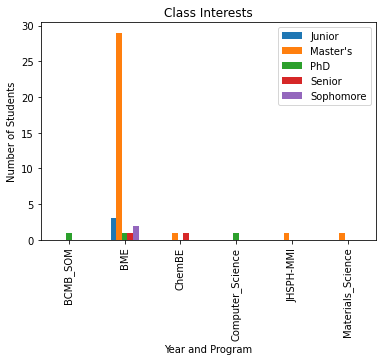

In [220]:
mat.plot.bar()
plt.title('Class Interests')
plt.xlabel('Year and Program')
plt.ylabel('Number of Students')

# Question 3 : Gene Expression Dataset

## Importing Data Set

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/GSE5859_exprs.csv")
df=df.drop(['Unnamed: 0'],axis=1)

In [17]:
df

,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,GSM25399.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,5.810930,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,6.666625,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
2,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,5.807496,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
3,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,7.711461,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864
4,3.597872,3.108801,3.128269,3.364947,3.125909,3.186834,3.311022,3.092042,3.167737,2.969579,...,3.331424,3.043856,3.151900,3.132253,3.250600,2.984125,3.152269,3.225123,3.222731,3.175846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,7.403732,8.173182,7.973033,6.993441,6.699585,6.926527,7.637367,7.006133,7.495841,10.557491,...,6.542924,6.701961,5.589173,6.999664,7.852193,7.728074,8.243135,6.597565,8.454131,6.635873
8789,9.499829,10.147961,11.527503,10.814206,10.629492,10.702125,11.285036,11.055667,11.388749,12.035119,...,11.160386,11.321130,10.944250,11.098619,10.065078,10.222762,10.265151,11.160541,10.333127,10.762506
8790,9.087917,9.356494,11.116875,10.056376,10.344678,10.186448,10.663689,10.411306,10.761674,11.384377,...,10.669841,10.725765,9.989154,10.428633,9.288700,9.378446,9.569521,10.421423,9.766366,10.108590
8791,10.499176,11.039103,2.721370,2.734304,5.357892,2.798261,2.802282,2.674753,2.881834,12.250990,...,2.774188,5.756867,4.570855,2.633058,10.544423,10.714675,10.901787,2.535893,10.903407,2.813128


## Demeaning and Data

In [19]:
df1=df
row_mean=np.mean(df1,axis=0)
for i in range(df1.shape[0]):
    df1.iloc[i,:]=df1.iloc[i,:] - row_mean
print('The mean of rows after demeaning is ',np.max(np.abs(np.mean(df1, axis = 0))))

column_mean=np.mean(df1,axis=1)
for j in range(df1.shape[1]):
    df1.iloc[:,j] = df1.iloc[:,j] - column_mean
print('The mean of columns after demeaning is ',np.max(np.abs(np.mean(df1, axis = 1))))

column_std=np.std(df1,axis=1)
for k in range(df1.shape[1]):
    df1.iloc[:,k]=df1.iloc[:,k]/column_std
    
print('The standard deviation of columns is ',np.max(np.abs(np.std(df1, axis = 1))))


The mean of rows after demeaning is  7.949717056345855e-16
The mean of columns after demeaning is  1.5372318802502167e-16
The standard deviation of columns is  1.0000000000000009


# Question 4 : Healthcare Spending

## Importing Data Set and transforming it to be in an appropritae form

In [387]:
df=pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv',header=2)
df=df.loc[1:51,:]
df=df.rename(index=df.iloc[:,0])
df=df.drop(['Location'],axis=1)
df.head(15)

,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,2000__Total Health Spending,...,2005__Total Health Spending,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending
Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,17504.0,...,25338.0,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0
Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,2867.0,...,4765.0,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0
Arizona,9269.0,9815.0,10655.0,11364.0,12042.0,12850.0,13418.0,14465.0,15550.0,16646.0,...,28190.0,30766.0,33366.0,35547.0,37258.0,38620.0,39295.0,40495.0,41481.0,43356.0
Arkansas,5632.0,6022.0,6397.0,6810.0,7343.0,7817.0,8393.0,8814.0,9407.0,10009.0,...,14611.0,15431.0,16426.0,17246.0,18071.0,18735.0,19356.0,20076.0,20500.0,21980.0
California,81438.0,87949.0,91963.0,94245.0,96870.0,100215.0,103681.0,111224.0,116036.0,121604.0,...,182958.0,194413.0,209397.0,221013.0,229541.0,241916.0,253844.0,266767.0,278168.0,291989.0
Colorado,8460.0,9215.0,9803.0,10382.0,11153.0,11863.0,12572.0,13790.0,14764.0,16307.0,...,22867.0,24849.0,26525.0,27797.0,29246.0,30187.0,31372.0,32726.0,34090.0,36398.0
Connecticut,10950.0,11635.0,12081.0,12772.0,13649.0,14139.0,14948.0,15944.0,16785.0,17691.0,...,24538.0,25997.0,27488.0,29141.0,31132.0,31727.0,32129.0,33421.0,34223.0,35413.0
Delaware,1938.0,2111.0,2285.0,2489.0,2655.0,2772.0,3026.0,3207.0,3539.0,3760.0,...,5899.0,6285.0,6735.0,7191.0,7495.0,7938.0,8365.0,8650.0,9038.0,9587.0
District of Columbia,2800.0,3098.0,3240.0,3255.0,3285.0,3362.0,3374.0,3461.0,3578.0,3611.0,...,4971.0,5138.0,5492.0,5779.0,6182.0,6582.0,7000.0,7130.0,7443.0,7871.0
Florida,39430.0,43041.0,46123.0,48886.0,51568.0,55090.0,58706.0,61558.0,65516.0,71581.0,...,106293.0,114162.0,120960.0,126977.0,133067.0,137609.0,141462.0,147685.0,150547.0,160624.0


## Line Plots for Total Healthcare Spending Per Year

Text(0.5, 1.0, 'Line Plots for Total Healthcare Spending Per Year')

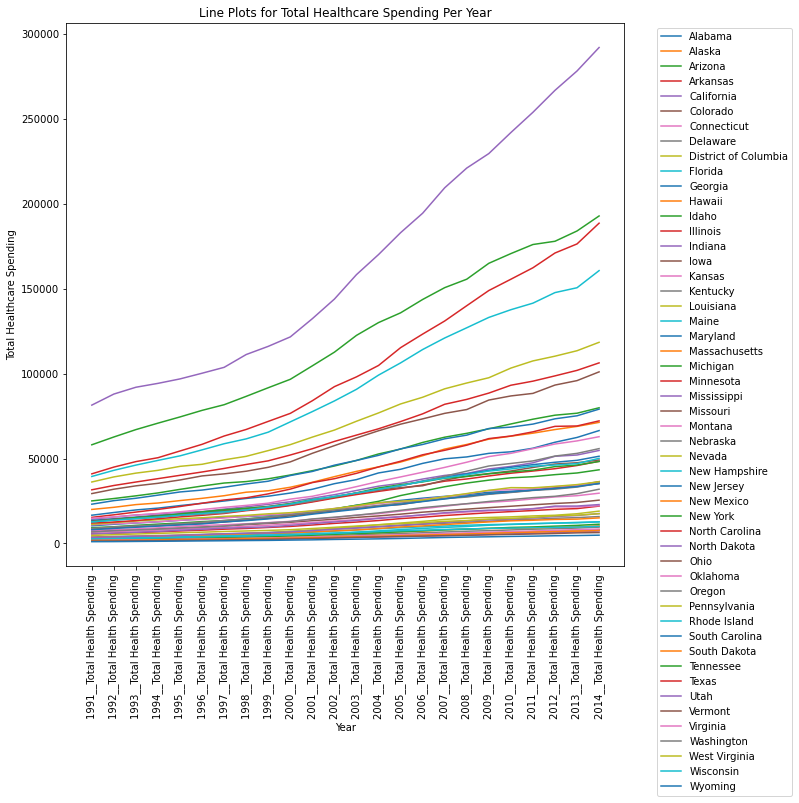

In [388]:
plt.figure(figsize=(10,10))
for i in range(df.shape[0]):
    plt.plot(df.iloc[i,:])
y=plt.xticks(rotation='90')
plt.legend(labels=df.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Total Healthcare Spending")
plt.xlabel("Year")
plt.title("Line Plots for Total Healthcare Spending Per Year")

## Stacked plots for Total Healtchare Spending Per Year Categorised State Wise

Text(0.5, 1.0, 'Bar Graphs for Total Healthcare Spending Per Year')

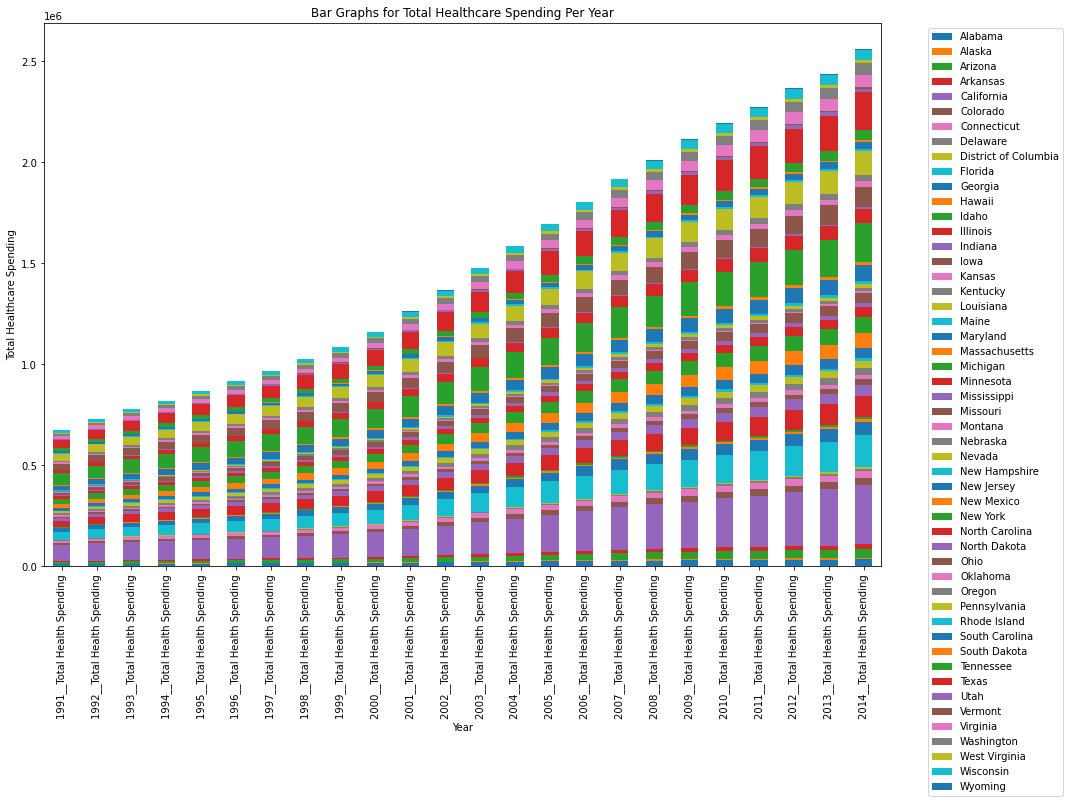

In [389]:
df.transpose().plot(kind='bar',stacked=True,figsize=(15,10))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
y=plt.xticks(rotation='90')
plt.ylabel("Total Healthcare Spending")
plt.xlabel("Year")
plt.title("Bar Graphs for Total Healthcare Spending Per Year")

# Question 5

## Bar plot for Average Healtchare Spending per Year 

Text(0.5, 1.0, 'Bar Plot Average Healthcare Spending Per State')

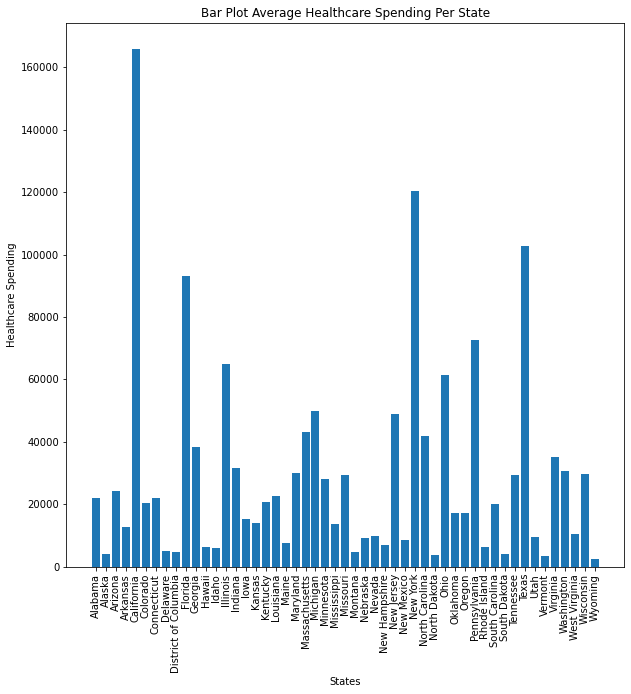

In [403]:
plt.figure(figsize=(10,10))
avg=np.sum(df,axis=1)/df.shape[1]
plt.bar(x=df.index,height=avg)
u=plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Healthcare Spending')
plt.title('Bar Plot Average Healthcare Spending Per State')